# Блок №1 Проект

Пришло время первого небольшого проекта по статистике! На этот раз исследуем набор [данных](https://disk.yandex.ru/d/DqsoMAMSlyd2hQ) о видеоиграх, объем продаж которых составил более 100 000 копий.

# Задания 
1. Первый шаг – загрузить данные и убедиться, что всё считалось правильно: посмотреть на столбцы, размер, наличие пропущенных значений (если есть – удалить). Также изучите типы переменных.
2. Постройте график распределения количества выпущенных игр по годам и выведите описательные характеристики переменной Year.
3. На каких платформах произошло больше всего релизов?
4. Игры каких издателей (Publisher) встречаются в датасете чаще всего?
5. В каком регионе медианное значение объема продаж игр Nintendo является наибольшим? (Регионы: NA, EU, JP, Other)
6. Изучите объемы продаж игр Nintendo в Японии с разбивкой жанрам. Посмотрите на медиану, среднее, межквартильный размах.
7. Визуализируйте динамику изменения объема мировых продаж (Global_Sales) по годам для игр Nintendo следующих жанров: Fighting, Simulation, Platform, Racing, Sports. В какие моменты времени было продано больше всего игр жанра Sports?

# Описание данных 
Имеются следующие поля:

+ Rank – место по объему продаж
+ Name – название игры
+ Platform – платформа, на которой выпущена игра
+ Year – год релиза
+ Genre – жанр
+ Publisher – издатель
+ NA_Sales – продажи в Северной Америке, в млн.
+ EU_Sales – продажи в Европе, в млн.
+ JP_Sales – продажи в Японии, в млн.
+ Other_Sales – продажи в остальном мире, в млн.
+ Global_Sales – продажи по всему миру, в млн.

In [58]:
# Импортируем библиотеки
import pandas as pd
import numpy as np

import scipy.stats as ss

import seaborn as sns
import matplotlib.pyplot as plt

sns.set(rc={'figure.figsize':(16, 6)}, style='whitegrid')

# Задание №1
___
Первый шаг – загрузить данные и убедиться, что всё считалось правильно: посмотреть на столбцы, типы данных, размерность, наличие пропущенных значений.

В каком столбце встретилось больше всего пропущенных значений? В качестве ответа укажите их число, после чего удалите строки с пропущенными значениями из датасета.

In [5]:
# Считываем данные
df = pd.read_csv('/home/jupyter-a.stamati-16/Statistic/games.csv')

In [12]:
# Посмотрим на данные
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [11]:
df.shape

(16598, 11)

In [10]:
# Посмотрим на тип данных
df.dtypes

Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

In [6]:
# Посмотрим на пропуски данных
df.isna().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [13]:
# Найдем максимальное количество пропусков
df.isna().sum().max()

271

In [15]:
# Уберем строки с пустыми значениями
df.dropna(inplace=True)

In [16]:
# Проверим результат
df.isna().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

# Задание №2
___
Проверим, какие переменные являются количественными, а какие категориальными. Соотнесите названия переменных с соответствующим типом данных.

In [73]:
df.dtypes

Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

In [74]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


Овтет:
![](https://sun9-34.userapi.com/impg/dn3EZPA5uWbahIqPxQcSVASKIYhSz5Io4eQKqQ/2ahN9vVh8SY.jpg?size=614x452&quality=96&sign=087660a815984c5986bfe4893ea1ade3&type=album)

# Задание №3
___
Выведите описательные характеристики переменной Year и постройте график распределения количества выпущенных игр по годам.

Выберите верные утверждения:
+ Медиана меньше, чем среднее
+ Медиана больше, чем среднее
+ Мода равна 2007
+ Мода равна 2009
+ Примерно половина игр была выпущена после 2007 года

In [25]:
# Переведем год в целый формат данных
df.Year = df.Year.astype('int')

In [27]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


/opt/tljh/user/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


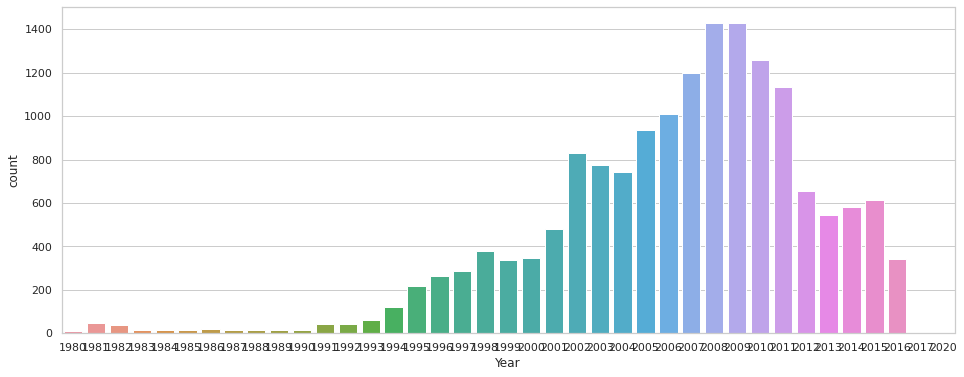

In [20]:
sns.countplot(df['Year']);

In [28]:
# Фильтруем данные по годам и делим на общее количество рядов, чтобы оценииь доли от целого:
df.query('Year > 2007').shape[0] / df.shape[0]

0.4906390031305629

In [29]:
# Выведем описательную статистику
df.Year.describe()

count    16291.000000
mean      2006.405561
std          5.832412
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2020.000000
Name: Year, dtype: float64

In [32]:
# Посмотрим моду
ss.mode(df.Year)

ModeResult(mode=array([2009]), count=array([1431]))

In [33]:
year_count = df.Year.value_counts().reset_index()
year_count.coulumns = ['year', 'cnt']
year_count.head(3)

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


,index,Year
0,2009,1431
1,2008,1428
2,2010,1257


Ответ:
+ Медиана больше, чем среднее
+ Мода равна 2009
+ Примерно половина игр была выпущена после 2007 года

# Задание №4
___
На каких платформах произошло больше всего релизов?

Оставьте названия только тех платформ, частота встречаемости которых составляет более 7%. Значения укажите в порядке убывания частоты встречаемости через запятую с пробелом.

Пример: 
```
'Wii', 'NES', 'GB'
```

In [83]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [45]:
# Отберем колонку Platform, для нее посчитаем частоту встречаемости каждого элемента и отберем нудные позиции
df_platform = df['Platform'].value_counts(normalize=True) \
                                .mul(100) \
                                .to_frame('pct') \
                                .query('pct > 7') \
                                .reset_index() \
                                .loc[:,'index'] \
                                .tolist()

df_platform_top

['DS', 'PS2', 'PS3', 'Wii', 'X360', 'PSP', 'PS']

In [37]:
# Выведем на печать
print(*df_platform_top, sep=', ')

DS, PS2, PS3, Wii, X360, PSP, PS


# Задание №5
___
Игры каких издателей (`Publisher`) встречаются в датасете чаще всего?

В качестве ответа укажите наибольшую абсолютную частоту встречаемости.

In [47]:
df.Publisher.value_counts()

Electronic Arts                 1339
Activision                       966
Namco Bandai Games               928
Ubisoft                          918
Konami Digital Entertainment     823
                                ... 
Wargaming.net                      1
Berkeley                           1
Lighthouse Interactive             1
King Records                       1
TechnoSoft                         1
Name: Publisher, Length: 576, dtype: int64

In [48]:
df.Publisher.value_counts().max()

1339

In [50]:
# Еще один способ, находим моду
ss.mode(df.Publisher)

ModeResult(mode=array(['Electronic Arts'], dtype=object), count=array([1339]))

# Задание №6
___
Сфокусируемся на играх от Nintendo. Посчитайте среднее, медиану и стандартное отклонение по продажам игр данного издателя в разных регионах (NA, EU, JP, Other). 

В каком регионе медианное значение объема продаж является наибольшим?

Варианты ответов:
+ NA (North America)
+ EU (Europe)
+ JP (Japan)
+ Other
+ Global

In [54]:
df.query('Publisher == "Nintendo"') \
    .loc[:, ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']] \
    .agg(['mean', 'median', 'std'])

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
mean,1.172055,0.601006,0.653721,0.136767,2.563836
median,0.375000,0.120000,0.280000,0.030000,0.920000
std,2.989913,1.743953,1.063110,0.464170,5.676925


In [53]:
# Еще один способ найти нужный результат
# df.query('Publisher == "Nintendo"') \
#     .loc[:, ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']] \
#     .describe(include='all')

Ответ:
+ NA (North America)

# Задание №7
___
Теперь посмотрим на продажи Nintendo в Японии по жанрам. Постройте боксплот, где:

+ по оси x будет расположен жанр игры (`Genre`)
+ по оси у – объем продаж в Японии (`JP_sales`)
Взглянем на получившиеся боксплоты. Что мы можем по ним сказать о данных?

Варианты ответов:
+ Среднее значение продаж игр жанра Fighting выше, чем у игр Simulation
+ Наибольший межквартильный размах наблюдается у игр жанра Fighting
+ Межквартильный размах у Strategy меньше, чем у Puzzle
+ Наибольший межквартильный размах наблюдается у игр жанра Role-Playing
+ Медианное значение продаж игр жанра Fighting выше, чем у игр Simulation

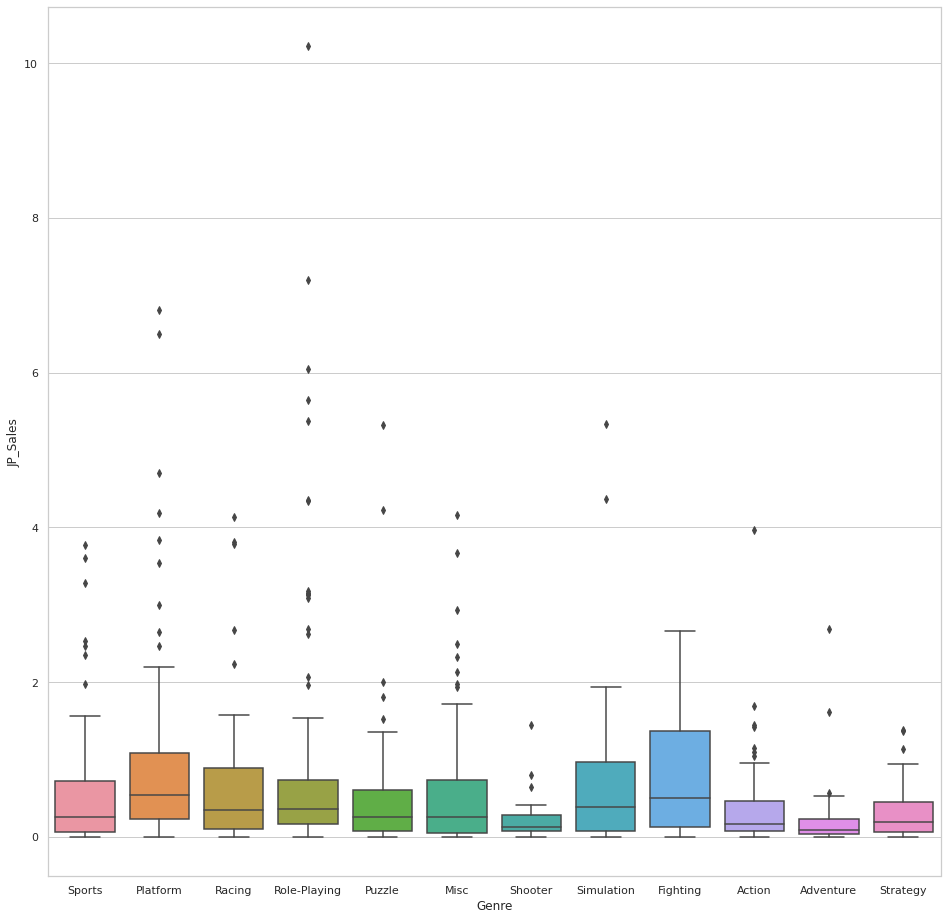

In [59]:
plt.figure(figsize=(16,16))
sns.boxplot(data=df.query('Publisher == "Nintendo"'), x='Genre', y='JP_Sales');

Ответ:
+ Наибольший межквартильный размах наблюдается у игр жанра Fighting
+ Межквартильный размах у Strategy меньше, чем у Puzzle
+ Медианное значение продаж игр жанра Fighting выше, чем у игр Simulation

# Задание №9

Визуализируйте динамику изменения объема мировых продаж (`Global_Sales`) по годам для игр Nintendo следующих жанров: Fighting, Simulation, Platform, Racing, Sports.

На каком отрезке времени было продано наибольшее количество копий игр жанра Sports? Иными словами, выберите отрезок, который включает в себя несколько крупных пиков.

Варианты ответов:
+ 2005 – 2006
+ 2005 – 2010
+ 1998 – 2014
+ 2009 – 2015

In [60]:
df_global = df.query('Publisher == "Nintendo" and Genre in ("Fighting", "Simulation", "Platform", "Racing", "Sports")') \
            .groupby(['Year', 'Genre']) \
            .Global_Sales \
            .sum() \
            .reset_index()

df_global.head()

,Year,Genre,Global_Sales
0,1983,Platform,5.62
1,1983,Sports,3.20
2,1984,Racing,5.68
3,1984,Sports,6.18
4,1985,Platform,43.17


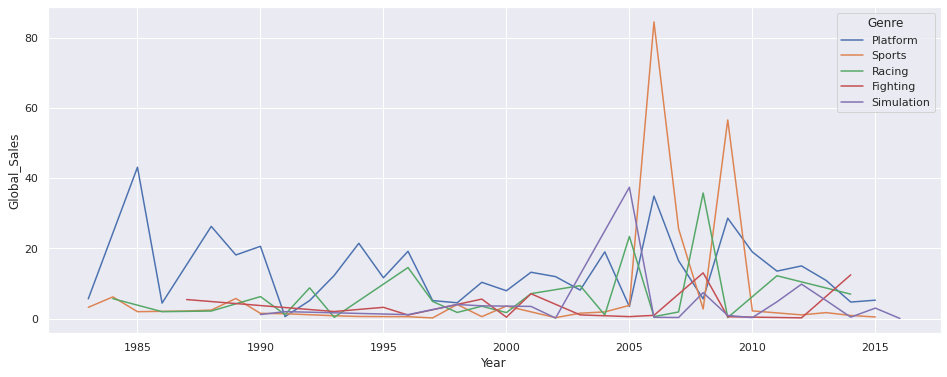

In [64]:
sns.lineplot(data=df_global, x="Year", y="Global_Sales", hue = 'Genre');

Ответ:
+ 2005 – 2010